# CS 109A/STAT 121A/AC 209A/CSCI E-109A  

## Lab 2: Cleaning and EDA of Goodreads 

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Goals

About 6000 odd "best books" were fetched and parsed from [Goodreads](https://www.goodreads.com). The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

We parsed the page for each book and saved data from all these pages in a tabular format as a CSV file. In this lab we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  


By the end of this lab, you should be able to:

- Load and systematically address missing values, ancoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

*This lab corresponds to lectures 2 and 3 and maps on to homework 1 and further.*

### Basic EDA workflow

(From the lecture, repeated here for convenience).

The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Report all the issues you found with the data and how you resolved them.  

[15 minutes]

----

Import the necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [2]:
column_names = ['rating', 'review_count', 'isbn', 'booktype', 'author_url',
                'year', 'genre_urls', 'dir', 'rating_count', 'name']
goodreads = pd.read_csv('data/goodreads.csv', names=column_names)
goodreads.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


Let's have a look at a summary of the data

In [3]:
goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
rating          5998 non-null float64
review_count    6000 non-null object
isbn            5525 non-null object
booktype        6000 non-null object
author_url      6000 non-null object
year            5993 non-null float64
genre_urls      5938 non-null object
dir             6000 non-null object
rating_count    6000 non-null object
name            6000 non-null object
dtypes: float64(2), object(8)
memory usage: 468.8+ KB


We see that we have 6000 books and 10 variables as expected and we can see that we have missing data for several of the variables. We also see that the review_count, isbn and rating_count are of type object when they should be of type int and that missing data. Let's drop any books with missing values.

In [4]:
goodreads = goodreads.dropna()
goodreads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5496 entries, 0 to 5999
Data columns (total 10 columns):
rating          5496 non-null float64
review_count    5496 non-null object
isbn            5496 non-null object
booktype        5496 non-null object
author_url      5496 non-null object
year            5496 non-null float64
genre_urls      5496 non-null object
dir             5496 non-null object
rating_count    5496 non-null object
name            5496 non-null object
dtypes: float64(2), object(8)
memory usage: 472.3+ KB


There are also invalid isbn's in the dataset. Isbn's must be positive integers.

In [5]:
goodreads[~goodreads.isbn.apply(str.isdigit)].isbn

52      014038572X
57      038039586X
67      038549081X
110     067168390X
118     039480001X
145     140003468X
146     038572179X
150     158049580X
155     000100039X
162     075640407X
219     080701429X
222     055357342X
237     030734813X
248     074348276X
260     142311339X
270     037582913X
272     034541005X
275     014131088X
278     030726999X
289     015206396X
295     014028009X
297     076790818X
298     006441034X
317     031253275X
374     140003065X
380     014241493X
388     006075995X
395     067976402X
399     159308143X
419     140679239X
           ...    
5590    149284490X
5600    037572706X
5611    074344647X
5644    031601768X
5674    159514062X
5684    067973449X
5686    067002497X
5699    080213663X
5738    038532328X
5739    067166607X
5746    080279839X
5757    080215042X
5772    031024756X
5779    033048933X
5784    037571927X
5815    031238078X
5833    006447030X
5860    055338564X
5873    144247372X
5885    158485782X
5894    159420229X
5911    1415

Let's remove these 459 books with invalid isbn's.

In [6]:
goodreads = goodreads[goodreads.isbn.apply(str.isdigit)]
len(goodreads)

5037

OK in total we dropped 963 books with missing or invalid data. Still 5037 books out of the original 6000 to work with.

Now let's fix up the data types.

In [7]:
goodreads[['review_count', 'isbn', 'year', 'rating_count']] = (
    goodreads[['review_count', 'isbn', 'year', 'rating_count']].
    apply(pd.to_numeric)
)
goodreads['year'] = goodreads.year.astype('int64')
goodreads.dtypes

rating          float64
review_count      int64
isbn              int64
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

Let's just check we have no duplicate isbn in the books.

In [8]:
len(goodreads.drop_duplicates(subset='isbn'))

5037

OK isbn is unique as expected. So let's index the dataframe using it.

In [9]:
goodreads = goodreads.set_index('isbn')
goodreads.head()

,rating,review_count,booktype,author_url,year,genre_urls,dir,rating_count,name
isbn,,,,,,,,,
439023483,4.40,136455,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
439358078,4.41,16648,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
316015849,3.56,85746,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
61120081,4.23,47906,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
679783261,4.23,34772,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


##   Part 2: Asking Questions 
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

[5 min]

---

- Which books have the highest overall rating? (or review count)
- Which authors have the most books in the list?
- Which authors have the books with the highest average rating? (or average review count)
- Which genres have the highest average ratings?
- What are the most popular genres year-by-year?

The dataframe contains all the information needed to address these questions.

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  

[10 minutes]

---

In [10]:
def get_author(url):
    return url[url.rfind('.') + 1:].replace('_', ' ')


def get_genres(url):
    return url.replace('/genres/', '')


goodreads['author'] = goodreads.author_url.apply(get_author)
goodreads['genres'] = goodreads.genre_urls.apply(get_genres)
goodreads.head()

,rating,review_count,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres
isbn,,,,,,,,,,,
439023483,4.40,136455,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,young-adult|science-fiction|dystopia|fantasy|s...
439358078,4.41,16648,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J K Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
316015849,3.56,85746,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie Meyer,young-adult|fantasy|romance|paranormal|vampire...
61120081,4.23,47906,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper Lee,classics|fiction|historical-fiction|academic|s...
679783261,4.23,34772,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane Austen,classics|fiction|romance|historical-fiction|li...


## Part 4: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms with both linear and log scales. Do you find anything interesting or strange? 


[10 minutes]

---

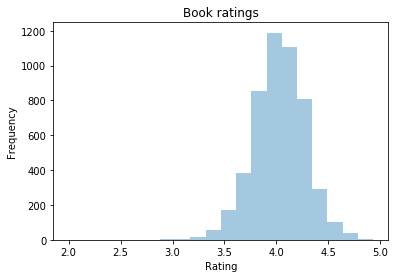

In [11]:
goodreads.rating.plot.hist(bins=20, alpha=0.4);
plt.xlabel("Rating")
plt.title("Book ratings");

Clearly most people are quite generous with their ratings as most ratings are between 3.5 to 4.5.

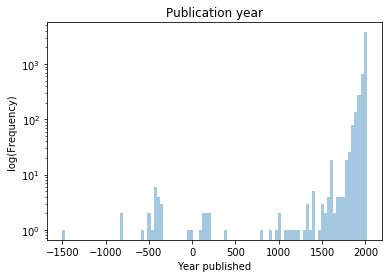

In [12]:
ax = goodreads.year.plot.hist(bins=100, alpha=0.4);
plt.xlabel("Year published")
plt.ylabel("log(Frequency)")
plt.title("Publication year");
ax.set_yscale('log')

The vast majority of books in the list are 'modern' books published after the 1800s. By far the most frequent books in the list are from the 20th century. No surprise here really as the sample of people also have lived mainly in the 20th century and are influenced by popular culture. I also suspect that the vast majority of book every published were probably published in the 20th century.

Also, the mini-peaks at significant times in creative history are clearly seen such as the Ancient Greeks and the Renaissance.

At first it seems strange that there are negative years when the books were published. But clearly this data is OK as there are some books published B.C. I've heard of several of these and the associated authors. 

In [13]:
goodreads.loc[goodreads.year < 0, ['year', 'name', 'author']]

,year,name,author
isbn,,,
143039954,-800,The Odyssey,Homer
147712556,-800,The Iliad/The Odyssey,Homer
140449140,-380,The Republic,Plato
679729526,-29,The Aeneid,Virgil
1580495931,-429,Oedipus Rex,Sophocles
1590302257,-512,The Art of War,Sun Tzu
140449183,-500,The Bhagavad Gita,Anonymous
1580493882,-442,Antigone,Sophocles
192840509,-560,Aesop's Fables,Aesop


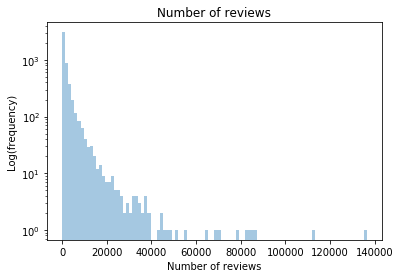

In [14]:
ax = goodreads.review_count.plot.hist(bins=100, alpha=0.4);
plt.xlabel("Number of reviews")
plt.ylabel("Log(frequency)")
plt.title("Number of reviews");
ax.set_yscale('log')

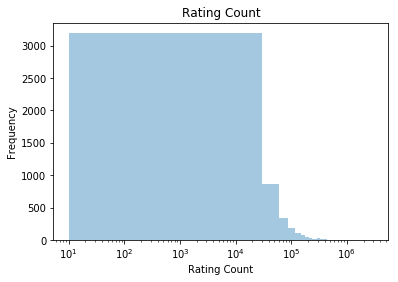

In [15]:
ax = goodreads.rating_count.plot.hist(bins=100, alpha=0.4);
plt.xlabel("Rating Count")
plt.title("Rating Count");
ax.set_xscale('log')

We can see that people vastly prefer to rate movies rather than review them. No surprise here as human beings are lazy. Also, a lot of these sites require you to be a member before you can review, whereas rating is open to anyone. This could also contrbute to what we see above.


## Part 5:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book." (After all, these are all the best books according to Goodreads)

[5 minutes] 

---

The top 10 rated books (with more than 1000 ratings) are:

In [16]:
rating_headings = ['rating', 'rating_count', 'name', 'author', 'year']
(goodreads[goodreads.rating_count > 1000].
 nlargest(n=10, columns='rating')[rating_headings])

,rating,rating_count,name,author,year
isbn,,,,,
740748475,4.80,22674,The Complete Calvin and Hobbes,Bill Watterson,2005
765326361,4.76,32304,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,2014
1433502410,4.76,7343,ESV Study Bible,Anonymous,2007
842339523,4.75,7044,Mark of the Lion Trilogy,Francine Rivers,1993
1401210856,4.75,3661,"The Absolute Sandman, Vol. 4",Neil Gaiman,2008
836221362,4.75,18637,Calvin and Hobbes,Bill Watterson,1996
545044251,4.73,141954,"Harry Potter Boxset (Harry Potter, #1-7)",J K Rowling,1998
1401210848,4.72,3805,"The Absolute Sandman, Vol. 3",Neil Gaiman,2008
679777482,4.71,2015,"Checkmate (The Lymond Chronicles, #6)",Dorothy Dunnett,1975


The top 10 reviewed books (with more than 1000 reviews) are:

In [17]:
review_headings = ['review_count', 'name', 'author', 'year']
(goodreads[goodreads.review_count > 1000].
 nlargest(n=10, columns='review_count')[review_headings])

,review_count,name,author,year
isbn,,,,
439023483,136455,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008
525478817,112279,The Fault in Our Stars,John Green,2012
307588378,87076,Gone Girl,Gillian Flynn,2012
316015849,85746,"Twilight (Twilight, #1)",Stephenie Meyer,2005
439023513,83643,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,2010
62024035,82098,"Divergent (Divergent, #1)",Veronica Roth,2011
439023491,79046,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,2009
399155341,70247,The Help,Kathryn Stockett,2009
375831002,69524,The Book Thief,Markus Zusak,2005


The top 10 rated classic (pre 20th century) books (with more than 1000 ratings) are:

In [18]:
(goodreads[(goodreads.rating_count > 1000) & (goodreads.year < 1900)]
 .nlargest(n=10, columns='rating')[rating_headings])

,rating,rating_count,name,author,year
isbn,,,,,
9646534783,4.65,3263,The Divan,Hafez,1680
1557091528,4.52,12894,The Constitution of the United States of America,James Madison,1787
670034851,4.52,2310,Shahnameh,Abolqasem Ferdowsi,1010
517053616,4.50,35436,The Complete Works,William Shakespeare,1623
1585161780,4.45,3959,Holy Bible,Anonymous,130
553214829,4.44,13841,The Declaration of Independence and The Consti...,Thomas Jefferson,1776
967686563,4.42,56539,The Book of Mormon,Joseph Smith Jr,1830
811201848,4.42,4144,Illuminations,Arthur Rimbaud,1875
60955503,4.42,5575,Complete Works,Arthur Rimbaud,1870


We can determine the top rated book (with more than 1000 ratings) in each year. We pick the first book to break ties.

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    func = {'rating': 'max', 'name': 'first', 'author': 'first'}
    display(goodreads[goodreads.rating_count > 1000].groupby(by=['year'])
            .agg(func))

,rating,name,author
year,,,
-1500,3.60,The Epic of Gilgamesh,Anonymous
-800,4.01,The Odyssey,Homer
-560,4.03,Aesop's Fables,Aesop
-512,3.92,The Art of War,Sun Tzu
-500,4.06,The Bhagavad Gita,Anonymous
-458,3.96,The Oresteia,Aeschylus
-442,3.52,Antigone,Sophocles
-440,3.94,The Histories,Herodotus
-431,3.80,Medea,Euripides


## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[15 minutes]

---

We one hot encode the genres to do this analysis. Obviously adding a column to the dataframe for each genre increases the dimensionality significantly. This obviously is not very efficient and a more advanced technique needs to be investigated in the future. However, it is relatively simple and allows for easy computation and visualization.

In [20]:
genres = goodreads.genres.apply(lambda g:
                                set(['genre_' + s.strip() for s in
                                     g.split('|')]))
goodreads = goodreads.join(genres.str.join('|').str.get_dummies())
goodreads.head()

,rating,review_count,booktype,author_url,year,genre_urls,dir,rating_count,name,author,genres,genre_14th-century,genre_15th-century,genre_16th-century,genre_17th-century,genre_18th-century,genre_19th-century,genre_20th-century,genre_abuse,genre_academia,genre_academic,genre_action,genre_activism,genre_adoption,genre_adult,genre_adult-fiction,genre_adventure,genre_africa,genre_african-american,genre_african-american-literature,genre_african-literature,genre_aliens,genre_alternate-history,genre_american,genre_american-civil-war,genre_american-fiction,genre_american-history,genre_american-novels,genre_americana,genre_ancient,genre_angels,genre_animal-fiction,genre_animals,genre_anime,genre_anthologies,genre_anthropology,genre_anthropomorphic,genre_apocalyptic,genre_architecture,genre_art,...,genre_theory,genre_thriller,genre_time-travel,genre_time-travel-romance,genre_tragedy,genre_trans,genre_transgender,genre_travel,genre_travelogue,genre_true-crime,genre_true-story,genre_turkish,genre_turkish-literature,genre_unicorns,genre_united-states,genre_urban-fantasy,genre_urban-planning,genre_urbanism,genre_us-presidents,genre_utopia,genre_vampires,genre_vegan,genre_video-games,genre_war,genre_weird-fiction,genre_werewolves,genre_western,genre_western-romance,genre_wicca,genre_wilderness,genre_wildlife,genre_witches,genre_wizards,genre_wolves,genre_womens,genre_womens-fiction,genre_womens-studies,genre_world-history,genre_world-war-ii,genre_writing,genre_x-men,genre_young-adult,genre_young-adult-contemporary,genre_young-adult-fantasy,genre_young-adult-historical-fiction,genre_young-adult-paranormal,genre_young-adult-romance,genre_young-readers,genre_zen,genre_zombies
isbn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
439023483,4.40,136455,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,young-adult|science-fiction|dystopia|fantasy|s...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
439358078,4.41,16648,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J K Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
316015849,3.56,85746,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie Meyer,young-adult|fantasy|romance|paranormal|vampire...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
61120081,4.23,47906,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper Lee,classics|fiction|historical-fiction|academic|s...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
679783261,4.23,34772,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane Austen,classics|fiction|romance|historical-fiction|li...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Let's create a dataframe with just the year and genre counts.

In [21]:
goodreads_genres = (goodreads.loc[:, 'genre_14th-century':'genre_zombies']
                    .join(goodreads.year))
goodreads_genres.head()

,genre_14th-century,genre_15th-century,genre_16th-century,genre_17th-century,genre_18th-century,genre_19th-century,genre_20th-century,genre_abuse,genre_academia,genre_academic,genre_action,genre_activism,genre_adoption,genre_adult,genre_adult-fiction,genre_adventure,genre_africa,genre_african-american,genre_african-american-literature,genre_african-literature,genre_aliens,genre_alternate-history,genre_american,genre_american-civil-war,genre_american-fiction,genre_american-history,genre_american-novels,genre_americana,genre_ancient,genre_angels,genre_animal-fiction,genre_animals,genre_anime,genre_anthologies,genre_anthropology,genre_anthropomorphic,genre_apocalyptic,genre_architecture,genre_art,genre_art-history,genre_arthurian,genre_asia,genre_asian-literature,genre_astronomy,genre_atheism,genre_australia,genre_autobiography,genre_bande-dessin%C3%A9e,genre_banned-books,genre_baseball,...,genre_thriller,genre_time-travel,genre_time-travel-romance,genre_tragedy,genre_trans,genre_transgender,genre_travel,genre_travelogue,genre_true-crime,genre_true-story,genre_turkish,genre_turkish-literature,genre_unicorns,genre_united-states,genre_urban-fantasy,genre_urban-planning,genre_urbanism,genre_us-presidents,genre_utopia,genre_vampires,genre_vegan,genre_video-games,genre_war,genre_weird-fiction,genre_werewolves,genre_western,genre_western-romance,genre_wicca,genre_wilderness,genre_wildlife,genre_witches,genre_wizards,genre_wolves,genre_womens,genre_womens-fiction,genre_womens-studies,genre_world-history,genre_world-war-ii,genre_writing,genre_x-men,genre_young-adult,genre_young-adult-contemporary,genre_young-adult-fantasy,genre_young-adult-historical-fiction,genre_young-adult-paranormal,genre_young-adult-romance,genre_young-readers,genre_zen,genre_zombies,year
isbn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
439023483,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2008
439358078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2003
316015849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2005
61120081,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1960
679783261,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1813


The top most popular genres (with more than 500 books) are shown below.

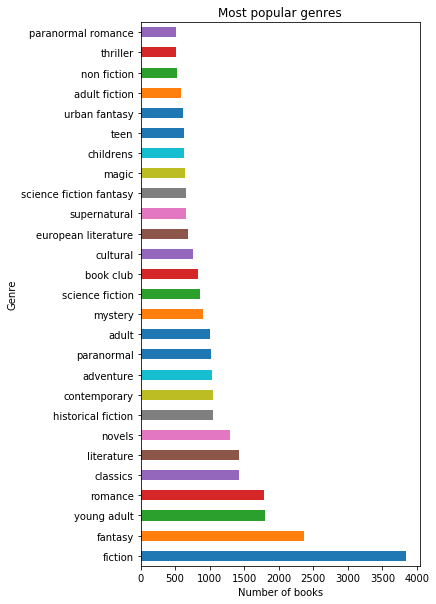

In [22]:
top_genres = goodreads_genres.drop('year', axis=1).sum().sort_values(
    ascending=False)
top_genres = top_genres[top_genres > 500]
ax = top_genres.plot(kind='barh', figsize=(5, 10),
                     title='Most popular genres');
ax.set_xlabel('Number of books')
ax.set_ylabel('Genre');
y_lables = [genre.replace('genre_', '').replace('-', ' ')
            for genre in top_genres.index.values]
ax.set_yticklabels(y_lables);

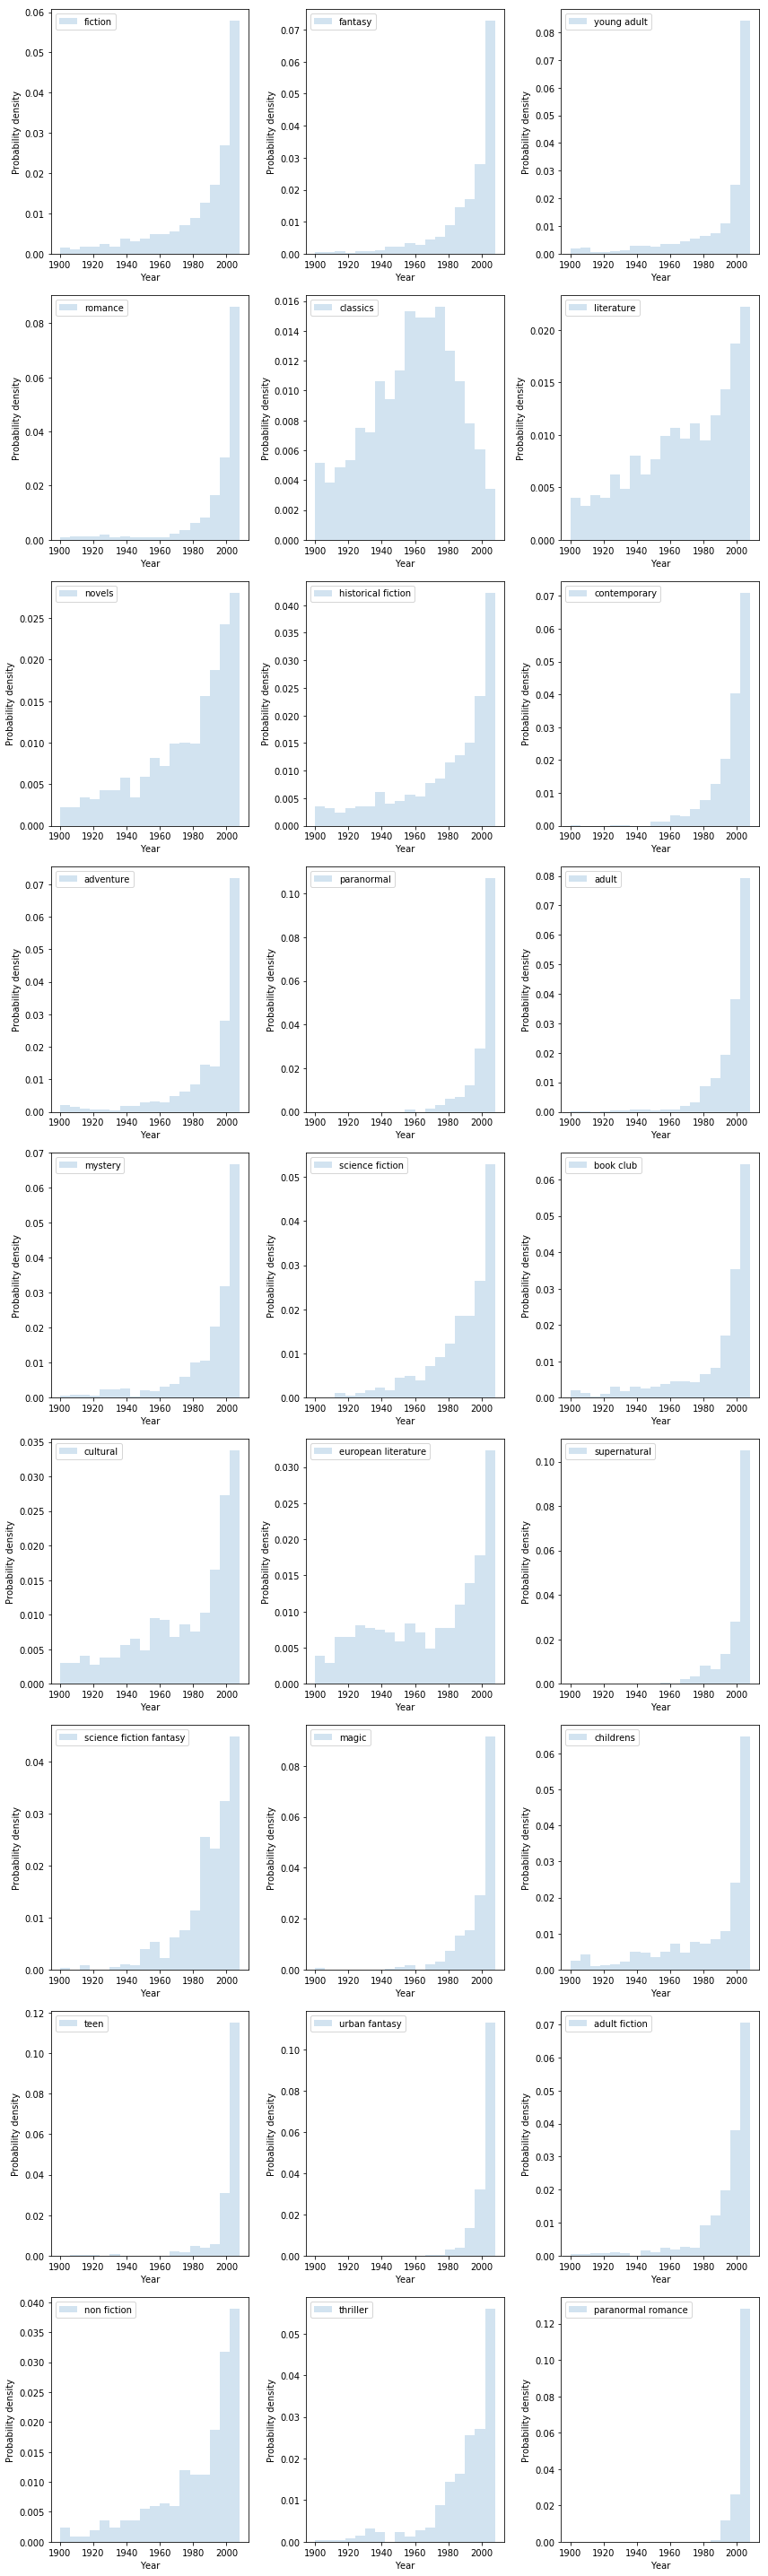

In [23]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(12, 40))
bins = np.arange(1900, 2013, 6)
for ax, genre in zip(axes.ravel(), top_genres.index.values):
    ax.hist(goodreads_genres[goodreads_genres[genre] == True].year.values,
            bins=bins, histtype='stepfilled', density=True, alpha=.2,
            ec='none', label=genre.replace('genre_', '').replace('-', ' '))

    ax.xaxis.set_ticks(np.arange(1900, 2013, 20))
    ax.set_xlabel('Year')
    ax.set_ylabel('Probability density')
    ax.legend(loc='upper left')

fig.tight_layout()

### Part 6.1: What can you conclude from the above visualizations?
Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

- The popularity of fantasy books is increasing with time.
- The popularity of classics books increased from the start of the 20th century A peak was reached in the 1960s to 1980s. Their popularity has been declining steadily since. 
- Paranormal romance is a relatively new genre of books not existing before the 1980s. Their popularity has been increasing every since.